In [2]:
#@title Librerias
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
import sympy as sp

# Laboratorio 04: Raíces

---
### Profesor: Juan Marcos Marín
### Nombre: Ross Anthony Miranda D'Angelo CC: 1034988497
*Métodos computacionales 2024-II*

---

#1
¿Para que ángulo el area del segmento circular es igual a un cuarto del area de una circunferencia?

- Muestre que la expresión que permite resolver este problema será:


\begin{equation}
\theta - \sin \theta = \frac{\pi}{2}
\end{equation}


- Construya una grafica para $\theta$  ¿Alrededor de que punto esta solución?(Para este punto se recomienda emplear `dataframe`).

- Emplee el metodo de biseccion, punto fijo,  newton y secante  para comprobar la solución intuida del apartado anterior.

In [ ]:
# Aqui va su código

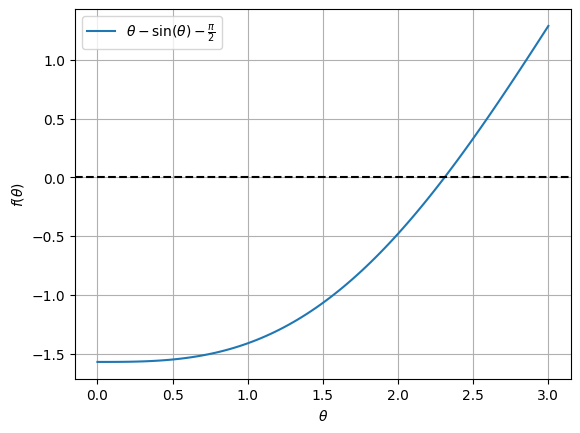

Aproximación inicial de la raíz usando DataFrame:
theta       2.303030
f(theta)   -0.011449
abs_f       0.011449
Name: 76, dtype: float64
Raíz con Bisección: 2.309881
Raíz con Newton-Raphson: 2.309881
Raíz con Punto Fijo: 2.309881
Raíz con Secante: 2.309881


In [4]:
from scipy.optimize import bisect, newton

def f(theta):
    return theta - np.sin(theta) - np.pi / 2


theta_vals = np.linspace(0, 3, 100)
f_vals = f(theta_vals)

# Grafica
plt.plot(theta_vals, f_vals, label=r"$\theta - \sin(\theta) - \frac{\pi}{2}$")
plt.axhline(0, color="black", linestyle="--")
plt.xlabel(r"$\theta$")
plt.ylabel(r"$f(\theta)$")
plt.legend()
plt.grid()
plt.show()

# DataFrame
df = pd.DataFrame({"theta": theta_vals, "f(theta)": f_vals})
df["abs_f"] = df["f(theta)"].abs()  # Valor absoluto para buscar el más cercano a 0
aprox_sol = df.loc[df["abs_f"].idxmin()]  # Encontrar el valor más cercano a 0

print("Aproximación inicial de la raíz usando DataFrame:")
print(aprox_sol)

# Método de Bisección
root_bisection = bisect(f, 1, 3)
print(f"Raíz con Bisección: {root_bisection:.6f}")

# Método de Newton-Raphson
root_newton = newton(f, 2)
print(f"Raíz con Newton-Raphson: {root_newton:.6f}")

# Método de Punto Fijo
def g(theta):
    return np.pi / 2 + np.sin(theta)  # Despejando θ en la ecuación original

def fixed_point_iteration(g, x0, tol=1e-6, max_iter=100):
    x = x0
    for _ in range(max_iter):
        x_next = g(x)
        if abs(x_next - x) < tol:
            return x_next
        x = x_next
    return None  # Si no converge

root_fixed_point = fixed_point_iteration(g, 2)
print(f"Raíz con Punto Fijo: {root_fixed_point:.6f}")

# Método de la Secante
def secant_method(f, x0, x1, tol=1e-6, max_iter=100):
    for _ in range(max_iter):
        if abs(f(x1)) < tol:
            return x1
        x_next = x1 - f(x1) * (x1 - x0) / (f(x1) - f(x0))
        x0, x1 = x1, x_next
    return None  # Si no converge

root_secant = secant_method(f, 1, 2)
print(f"Raíz con Secante: {root_secant:.6f}")


# 2

La ecuación de Kepler juega un papel importante en la mecánica celeste, ya que permite el calculo de la posición angular de objetos orbitantes. Para todas las órbitas elipticas, la ecuación

$$M = E- e\sin(E)$$

siendo $M$ la anomalía media, $E$ la anomalía excéntrica y $e$ la excentricidad ($e= \sqrt{1-b/a}$) (con $a>b$ los semiejes). Los astrónomos definen las "anomalías"  como posiciones angulares: la anomalía media $M$ es la posición angular del objeto en una órbita circular ficticia y, suponiendo una velocidad angular constante, puede relacionarse con el lapso de tiempo transcurrido desde el paso por el perihelio

$$M= \frac{2\pi}{T} (t-t_0)$$

donde $T$ es el periodo orbital y $t_0$ el tiempo cuando el objeto está en el perihelio.

Para el cometa Halley $e=0.9672671$, $T=75.96000$ años y $t_0=1986.1113$ años (Febrero 9 de 1986).

* Encuentre $E$ para el cometa Halley el 1 de abril de 1986. Para esto, haga una gráfica de

$$f(E) = E - e\sin(E) - M$$

para $E\in [0,1]$.

* Grafique $E=E(t)$ para todo un periodo de revolución y resuelva usando el método de Newton y secante

$$E-e\sin(E) - M(t) = 0$$

con un paso de $\Delta t = T/100$. $t_i = t_0 + (i)*\Delta t$, comenzando en $E(t_0) = 0$


In [ ]:
# Aqui va su código

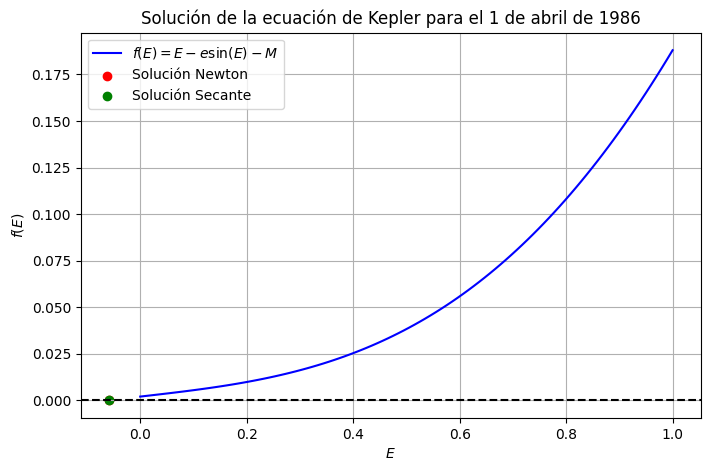

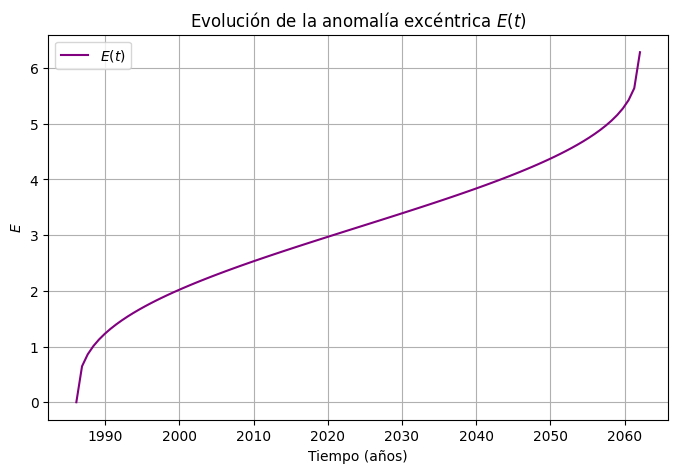

,Tiempo (años),M,E
0,1986.111300,0.000000,0.000000
1,1986.878573,0.063467,0.644938
2,1987.645845,0.126933,0.859917
3,1988.413118,0.190400,1.008994
4,1989.180391,0.253866,1.127739


In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import newton, root_scalar
import pandas as pd

# Parámetros del problema
e = 0.9672671  # Excentricidad
T = 75.96000   # Periodo orbital en años
t0 = 1986.1113 # Tiempo en el perihelio

def M(t):
    return (2 * np.pi / T) * (t - t0)

def f(E, M):
    return E - e * np.sin(E) - M

def df_dE(E, M):
    return 1 - e * np.cos(E)

# 1. Encontrar E para el 1 de abril de 1986
t_april_1986 = 1986 + (31 + 1) / 365  # Convertir fecha a años
M_april_1986 = M(t_april_1986)

# Resolver usando Newton-Raphson
E_newton = newton(f, x0=0.5, fprime= df_dE, args=(M_april_1986,))

# Resolver usando el método de la secante
sol_secante = root_scalar(f, args=(M_april_1986,), method='secant', x0=0.5, x1=0.6)
E_secante = sol_secante.root

# 2. Graficar f(E) en [0,1]
E_values = np.linspace(0, 1, 100)
f_values = f(E_values, M_april_1986)

plt.figure(figsize=(8,5))
plt.plot(E_values, f_values, label='$f(E) = E - e \sin(E) - M$', color='b')
plt.axhline(0, color='k', linestyle='--')
plt.scatter([E_newton], [0], color='r', label='Solución Newton')
plt.scatter([E_secante], [0], color='g', label='Solución Secante')
plt.xlabel('$E$')
plt.ylabel('$f(E)$')
plt.legend()
plt.title('Solución de la ecuación de Kepler para el 1 de abril de 1986')
plt.grid()
plt.show()

# 3. Calcular E(t) en un periodo orbital completo
ti_values = np.linspace(t0, t0 + T, 100)
M_values = M(ti_values)
E_values = [newton(f, x0=M_val, fprime=df_dE, args=(M_val,), maxiter=1000) for M_val in M_values]

# Crear DataFrame
df = pd.DataFrame({'Tiempo (años)': ti_values, 'M': M_values, 'E': E_values})

# 4. Graficar E(t)
plt.figure(figsize=(8,5))
plt.plot(ti_values, E_values, label='$E(t)$', color='purple')
plt.xlabel('Tiempo (años)')
plt.ylabel('$E$')
plt.title('Evolución de la anomalía excéntrica $E(t)$')
plt.legend()
plt.grid()
plt.show()

# Mostrar DataFrame
df.head()


#3
En la teoria de campo medio, la magnetización como función de la temperatura de un material magnético puede ser calculada como:

\begin{equation}
m(T) = \tanh\left( \frac{m(T)}{T} \right)
\end{equation}

donde $m$ y $T$ son la magnetizacion y temperatura reducida respectivamente


Para $T = 0.5$, determine:

* La magnetización reducida empleando el metodo de la secante y Newton-Raphson(Muestre su resultado con 4 cifras)

* Valide su respuestado con el metodo de punto fijo.
(Muestre su resultado con 4 cifras)

Ahora, defina `T = np.linspace(0.1,0.99,100)`, y emple el metodo de la secante para construir un gráfico de magnetización reducida como función de la temperatura para los  100 valores  de T.

In [ ]:
# Aqui va su código

Magnetización con Newton-Raphson para T=0.5: 0.9575
Magnetización con la secante para T=0.5: 0.9575
Magnetización con punto fijo para T=0.5: 0.9575


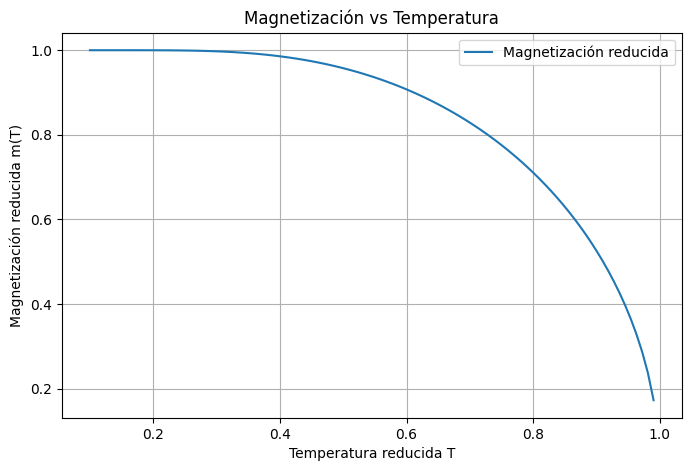

In [16]:

def f(m, T):
    return m - np.tanh(m / T)

# Derivada Newton-Raphson: f'(m) = 1 - sech²(m/T)
def df_dm(m, T):
    return 1 - (1 / np.cosh(m / T))**2

# T = 0.5 Newton-Raphson
T_fixed = 0.5
m_newton = newton(f, x0=1, fprime=df_dm, args=(T_fixed,))
print(f"Magnetización con Newton-Raphson para T=0.5: {m_newton:.4f}")

# método de la secante
m_secante = root_scalar(f, args=(T_fixed,), method='secant', x0=1, x1=0.5).root
print(f"Magnetización con la secante para T=0.5: {m_secante:.4f}")

# punto fijo
def punto_fijo(T, tol=1e-6, max_iter=100):
    m = 1.0  # Estimación inicial
    for _ in range(max_iter):
        m_new = np.tanh(m / T)
        if np.abs(m_new - m) < tol:
            return m_new
        m = m_new
    return m  # Si no converge en max_iter, devuelve el último valor

m_punto_fijo = punto_fijo(T_fixed)
print(f"Magnetización con punto fijo para T=0.5: {m_punto_fijo:.4f}")

# Graficar m(T) para T en [0.1, 0.99] usando la secante
T_values = np.linspace(0.1, 0.99, 100)
m_values = [root_scalar(f, args=(T,), method='secant', x0=1, x1=0.5).root for T in T_values]

plt.figure(figsize=(8, 5))
plt.plot(T_values, m_values, label="Magnetización reducida")
plt.xlabel("Temperatura reducida T")
plt.ylabel("Magnetización reducida m(T)")
plt.title("Magnetización vs Temperatura")
plt.legend()
plt.grid()
plt.show()
